In [1]:
#importing python script having all required libraries imported
# script also contains a function to clean and generate tokenized tweets 
from tweet_cleaning import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
#importing tweets
data= pd.read_csv(r'D:\Academics\Project-Social Media Mining\New file\coods\covid-allcood.csv')
print(data.shape)
data.head()

(294419, 9)


,created_at,id,lang,text,user_location,city,country,latitude,longitude
0,2020-01-23 22:36:49,1220475499366862849,en,"RT @WHO: BREAKING: ""I am not declaring a publi...",Waikiki,Honolulu,United States of America,21.304547,-157.855676
1,2020-01-26 19:35:19,1221516989115531264,en,Thinking of those affected by the Wuhan/corona...,New York,New York,United States of America,40.712728,-74.006015
2,2020-01-24 01:56:26,1220525734839701505,en,RT @cnni: The first person diagnosed with the ...,Cloud N.09,Limoges,France,45.835424,1.264485
3,2020-01-26 06:39:18,1221321697263001603,en,RT @Unkle_K: This is how the coronavirus started,"Maryland, USA",Maryland,United States of America,39.516223,-76.938207
4,2020-01-27 18:43:30,1221866335979941889,en,"Coronavirus, Yesterday’s tragedies all those f...",NYC,New York,United States of America,40.712728,-74.006015


In [7]:
# clean is a function defined in a python script, it applies all preprocessing steps to clean and generates tokenized tweets
data['Tweets'] = data['text'].apply(clean)
data.head(10)

,created_at,id,lang,text,user_location,city,country,latitude,longitude,Tweets
0,2020-01-23 22:36:49,1220475499366862849,en,"RT @WHO: BREAKING: ""I am not declaring a publi...",Waikiki,Honolulu,United States of America,21.304547,-157.855676,"[breaking, declaring, public, health, emergenc..."
1,2020-01-26 19:35:19,1221516989115531264,en,Thinking of those affected by the Wuhan/corona...,New York,New York,United States of America,40.712728,-74.006015,"[thinking, affected, virus]"
2,2020-01-24 01:56:26,1220525734839701505,en,RT @cnni: The first person diagnosed with the ...,Cloud N.09,Limoges,France,45.835424,1.264485,"[first, person, diagnosed, wuhan, treated, med..."
3,2020-01-26 06:39:18,1221321697263001603,en,RT @Unkle_K: This is how the coronavirus started,"Maryland, USA",Maryland,United States of America,39.516223,-76.938207,[started]
4,2020-01-27 18:43:30,1221866335979941889,en,"Coronavirus, Yesterday’s tragedies all those f...",NYC,New York,United States of America,40.712728,-74.006015,"[yesterdays, tragedies, family, members, lost,..."
5,2020-01-26 02:42:39,1221262143154282498,en,@PattyHajdu @cathmckenna 1. We know China lie...,"Ontario, Canada",Ontario,Canada,50.000678,-86.000977,"[know, china, lies, know, epicentre, wuhan, kn..."
6,2020-01-25 02:01:08,1220889305188569088,en,RT @siwuol_: rt to save life #coronavirus http...,"Lille, France",Lille,France,50.636565,3.063528,"[save, life]"
7,2020-01-24 09:02:25,1220632936627785729,en,"RT @demure_kitty: Because of my viral video, I...",Bristol,Bristol,United Kingdom,51.453802,-2.597298,"[viral, video, asked, travel, part, discussion..."
8,2020-01-24 17:46:33,1220764842233073664,en,RT @badiucao: Another video showing medics fro...,Blue Ridge Mountains,La Trinidad,United States of America,37.169397,-104.500541,"[another, video, showing, medics, completely, ..."
9,2020-01-26 00:04:10,1221222257571188736,en,RT @v_shakthi: Wearing a face mask does help i...,on my back,Mississauga,Canada,43.590338,-79.645729,"[wearing, face, mask, help, properly, wing, un..."


In [8]:
vaclist=set(['injection','prevention','shot','vaccination','anesthetic','antibiotic','antidote','antiseptic','antitoxin',
         'balm','biologic','capsule','cure','dose','drug','elixir','injection','inoculation','liniment','lotion',
         'medicament','ointment','pharmaceutical','pharmacon','physic','pill','potion','prescription','remedy',
         'salve','sedative','serum','tablet','tincture','tonic','vaccination','vaccine','smallpox','measles',
         'diphtheria','vaccination','medication','malaria','inoculation','cowpox','edward jenner','tetanus',
         'rubella','rabies','influenza','infectious', 'disease','hiv','infection','drug','pathogen','antibiotic',
         'immune system','louis pasteur','antibody','antigen','immunization','chickenpox','mumps','rotavirus','immunity',
         'disease','polio','prophylaxis','vaccinations','insulin','flu','antiviral','therapeutic','vaccinated','pneumovax',
         'tuberculosis','penicillin','doses','hpv','pneumococcal'])
print(len(vaclist))

74


In [9]:
def findvacword(row):
    for word in row:
        if word in vaclist:
            return True
        else:
            continue
    return False

In [10]:
#data1=data.head(100)
data1=pd.DataFrame(data[data['Tweets'].apply(findvacword)==True])

In [11]:
print(data1.shape)
data1.head()

(12579, 10)


,created_at,id,lang,text,user_location,city,country,latitude,longitude,Tweets
27,2020-01-27 12:54:39,1221778547716558848,en,RT @NatashaFatah: Big (not all) January storie...,"Richmond Hill, Ontario",Richmond Hill,Canada,43.880078,-79.439392,"[big, not, all, january, stories, killing, ira..."
28,2020-01-25 18:57:06,1221144984025325568,en,@eliferhannn @cakepls @PDChina I think it’s he...,"Sacramento, CA",Sacramento,United States of America,38.581572,-121.494400,"[think, its, helpful, put, things, perspective..."
37,2020-01-25 17:39:37,1221125484542484482,en,RT @KimKim03420670: !!!!! This is why the dise...,"Johor Bahru, Johor",Johor Bahru,Malaysia,1.495304,103.755084,"[disease, happen, china]"
48,2020-01-24 14:10:22,1220710436573798400,en,RT @pumpkinking39: Leave it to a college town ...,"College Station, TX",College Station,United States of America,30.595529,-96.307104,"[leave, college, town, full, alcoholics, make,..."
49,2020-01-25 15:35:34,1221094267025752064,en,"I mean same, I was like this when Ebola hit th...",Old hollywood,Hollywood,United States of America,34.098003,-118.329523,"[mean, same, like, ebola, hit, states, reason,..."


In [12]:
# importing library to apply sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
data1["sentiments"] = data1['Tweets'].str.join(" ").apply(lambda x: sid.polarity_scores(x))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
data1.head(10)

,created_at,id,lang,text,user_location,city,country,latitude,longitude,Tweets,sentiments
27,2020-01-27 12:54:39,1221778547716558848,en,RT @NatashaFatah: Big (not all) January storie...,"Richmond Hill, Ontario",Richmond Hill,Canada,43.880078,-79.439392,"[big, not, all, january, stories, killing, ira...","{'neg': 0.385, 'neu': 0.615, 'pos': 0.0, 'comp..."
28,2020-01-25 18:57:06,1221144984025325568,en,@eliferhannn @cakepls @PDChina I think it’s he...,"Sacramento, CA",Sacramento,United States of America,38.581572,-121.494400,"[think, its, helpful, put, things, perspective...","{'neg': 0.132, 'neu': 0.609, 'pos': 0.259, 'co..."
37,2020-01-25 17:39:37,1221125484542484482,en,RT @KimKim03420670: !!!!! This is why the dise...,"Johor Bahru, Johor",Johor Bahru,Malaysia,1.495304,103.755084,"[disease, happen, china]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
48,2020-01-24 14:10:22,1220710436573798400,en,RT @pumpkinking39: Leave it to a college town ...,"College Station, TX",College Station,United States of America,30.595529,-96.307104,"[leave, college, town, full, alcoholics, make,...","{'neg': 0.104, 'neu': 0.609, 'pos': 0.287, 'co..."
49,2020-01-25 15:35:34,1221094267025752064,en,"I mean same, I was like this when Ebola hit th...",Old hollywood,Hollywood,United States of America,34.098003,-118.329523,"[mean, same, like, ebola, hit, states, reason,...","{'neg': 0.26, 'neu': 0.404, 'pos': 0.336, 'com..."
65,2020-01-26 17:29:08,1221485232672727041,en,The coronavirus is the swine flu 2.0,The Throne,Washington,United States of America,38.894992,-77.036558,"[swine, flu]","{'neg': 0.722, 'neu': 0.278, 'pos': 0.0, 'comp..."
71,2020-01-26 01:35:40,1221245285785096193,en,RT @spectatorindex: BREAKING: China's coronavi...,"Ahmedabad, India",Ahmedabad,India,23.021624,72.579707,"[breaking, chinas, death, toll, rises, cases, ...","{'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp..."
121,2020-01-26 08:57:21,1221356438766796800,en,RT @ochealth: PRESS RELEASE: The OC Health Ca...,"San Diego, CA",San Diego,United States of America,32.717421,-117.162771,"[press, release, health, care, agencys, commun...","{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp..."
132,2020-01-24 22:02:17,1220829197230276608,en,“Influenza has already sickened at least 13 mi...,"Washington, USA",Washington,United States of America,38.894992,-77.036558,"[influenza, already, sickened, least, million,...","{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'comp..."
142,2020-01-27 19:29:09,1221877826120507393,en,"China says the Wuhan virus, unlike SARS, is in...","Austin, TX",Austin,United States of America,30.271129,-97.743700,"[china, says, wuhan, virus, unlike, sars, infe...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [14]:
# polarity scores generate dictionary of positive, negative, neutral and compund values of tweets
# here we drop sentiments columns from data and replace it with its series
data1 = pd.concat([data1.drop(['sentiments'], axis=1), data1['sentiments'].apply(pd.Series)], axis=1)
data1.head(10)

,created_at,id,lang,text,user_location,city,country,latitude,longitude,Tweets,neg,neu,pos,compound
27,2020-01-27 12:54:39,1221778547716558848,en,RT @NatashaFatah: Big (not all) January storie...,"Richmond Hill, Ontario",Richmond Hill,Canada,43.880078,-79.439392,"[big, not, all, january, stories, killing, ira...",0.385,0.615,0.000,-0.7845
28,2020-01-25 18:57:06,1221144984025325568,en,@eliferhannn @cakepls @PDChina I think it’s he...,"Sacramento, CA",Sacramento,United States of America,38.581572,-121.494400,"[think, its, helpful, put, things, perspective...",0.132,0.609,0.259,0.3612
37,2020-01-25 17:39:37,1221125484542484482,en,RT @KimKim03420670: !!!!! This is why the dise...,"Johor Bahru, Johor",Johor Bahru,Malaysia,1.495304,103.755084,"[disease, happen, china]",0.000,1.000,0.000,0.0000
48,2020-01-24 14:10:22,1220710436573798400,en,RT @pumpkinking39: Leave it to a college town ...,"College Station, TX",College Station,United States of America,30.595529,-96.307104,"[leave, college, town, full, alcoholics, make,...",0.104,0.609,0.287,0.4767
49,2020-01-25 15:35:34,1221094267025752064,en,"I mean same, I was like this when Ebola hit th...",Old hollywood,Hollywood,United States of America,34.098003,-118.329523,"[mean, same, like, ebola, hit, states, reason,...",0.260,0.404,0.336,0.1779
65,2020-01-26 17:29:08,1221485232672727041,en,The coronavirus is the swine flu 2.0,The Throne,Washington,United States of America,38.894992,-77.036558,"[swine, flu]",0.722,0.278,0.000,-0.3818
71,2020-01-26 01:35:40,1221245285785096193,en,RT @spectatorindex: BREAKING: China's coronavi...,"Ahmedabad, India",Ahmedabad,India,23.021624,72.579707,"[breaking, chinas, death, toll, rises, cases, ...",0.394,0.606,0.000,-0.5994
121,2020-01-26 08:57:21,1221356438766796800,en,RT @ochealth: PRESS RELEASE: The OC Health Ca...,"San Diego, CA",San Diego,United States of America,32.717421,-117.162771,"[press, release, health, care, agencys, commun...",0.000,0.775,0.225,0.4939
132,2020-01-24 22:02:17,1220829197230276608,en,“Influenza has already sickened at least 13 mi...,"Washington, USA",Washington,United States of America,38.894992,-77.036558,"[influenza, already, sickened, least, million,...",0.467,0.533,0.000,-0.8360
142,2020-01-27 19:29:09,1221877826120507393,en,"China says the Wuhan virus, unlike SARS, is in...","Austin, TX",Austin,United States of America,30.271129,-97.743700,"[china, says, wuhan, virus, unlike, sars, infe...",0.000,1.000,0.000,0.0000


In [15]:
# finding any row with no tweets after preprocessing and drop those rows
empty_indexlist=list(data1[data1['Tweets'].str.len() < 1].index)
print("number of empty rows: ",len(empty_indexlist))
data1=data1.drop(empty_indexlist)
data1=data1.reset_index(drop=True)
print(data1.shape)
data1.head(10)

number of empty rows:  0
(12579, 14)


,created_at,id,lang,text,user_location,city,country,latitude,longitude,Tweets,neg,neu,pos,compound
0,2020-01-27 12:54:39,1221778547716558848,en,RT @NatashaFatah: Big (not all) January storie...,"Richmond Hill, Ontario",Richmond Hill,Canada,43.880078,-79.439392,"[big, not, all, january, stories, killing, ira...",0.385,0.615,0.000,-0.7845
1,2020-01-25 18:57:06,1221144984025325568,en,@eliferhannn @cakepls @PDChina I think it’s he...,"Sacramento, CA",Sacramento,United States of America,38.581572,-121.494400,"[think, its, helpful, put, things, perspective...",0.132,0.609,0.259,0.3612
2,2020-01-25 17:39:37,1221125484542484482,en,RT @KimKim03420670: !!!!! This is why the dise...,"Johor Bahru, Johor",Johor Bahru,Malaysia,1.495304,103.755084,"[disease, happen, china]",0.000,1.000,0.000,0.0000
3,2020-01-24 14:10:22,1220710436573798400,en,RT @pumpkinking39: Leave it to a college town ...,"College Station, TX",College Station,United States of America,30.595529,-96.307104,"[leave, college, town, full, alcoholics, make,...",0.104,0.609,0.287,0.4767
4,2020-01-25 15:35:34,1221094267025752064,en,"I mean same, I was like this when Ebola hit th...",Old hollywood,Hollywood,United States of America,34.098003,-118.329523,"[mean, same, like, ebola, hit, states, reason,...",0.260,0.404,0.336,0.1779
5,2020-01-26 17:29:08,1221485232672727041,en,The coronavirus is the swine flu 2.0,The Throne,Washington,United States of America,38.894992,-77.036558,"[swine, flu]",0.722,0.278,0.000,-0.3818
6,2020-01-26 01:35:40,1221245285785096193,en,RT @spectatorindex: BREAKING: China's coronavi...,"Ahmedabad, India",Ahmedabad,India,23.021624,72.579707,"[breaking, chinas, death, toll, rises, cases, ...",0.394,0.606,0.000,-0.5994
7,2020-01-26 08:57:21,1221356438766796800,en,RT @ochealth: PRESS RELEASE: The OC Health Ca...,"San Diego, CA",San Diego,United States of America,32.717421,-117.162771,"[press, release, health, care, agencys, commun...",0.000,0.775,0.225,0.4939
8,2020-01-24 22:02:17,1220829197230276608,en,“Influenza has already sickened at least 13 mi...,"Washington, USA",Washington,United States of America,38.894992,-77.036558,"[influenza, already, sickened, least, million,...",0.467,0.533,0.000,-0.8360
9,2020-01-27 19:29:09,1221877826120507393,en,"China says the Wuhan virus, unlike SARS, is in...","Austin, TX",Austin,United States of America,30.271129,-97.743700,"[china, says, wuhan, virus, unlike, sars, infe...",0.000,1.000,0.000,0.0000


In [16]:
#pip install wordcould

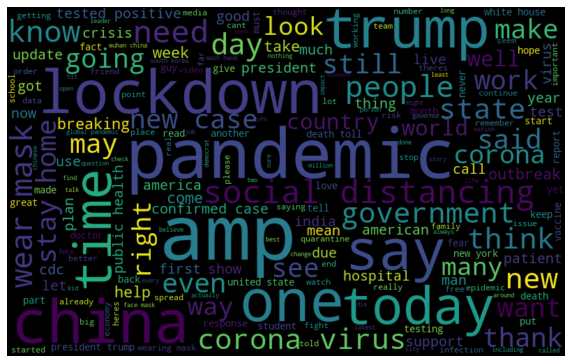

In [27]:
# storing all words from tweets in a list to visualize in wordcoud
all_words = ' '.join([text for text in data['Tweets'].str.join(" ")])

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


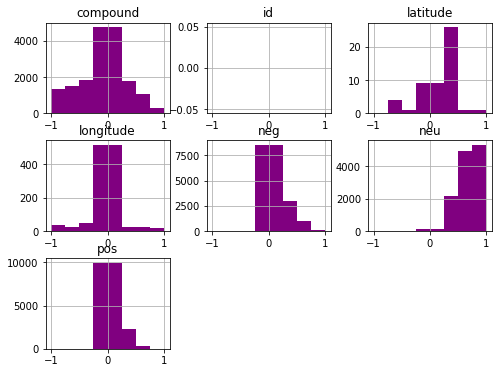

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
data1.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],ax=ax,color="purple")

#plt.title("Sentiments from Tweets on Climate Change")
plt.show()

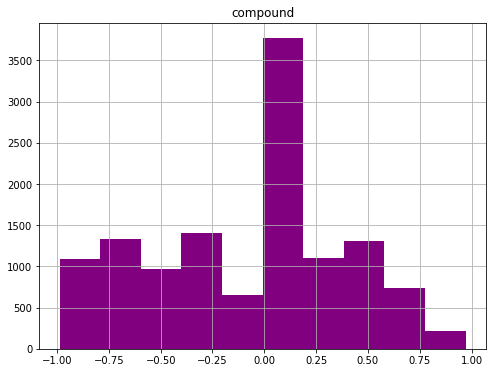

In [19]:
sentiment_df = pd.DataFrame(data1, columns=["compound", "Tweets"])
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(ax=ax,color="purple")

#plt.title("Sentiments from Tweets on Climate Change")
plt.show()

In [20]:
# function to name a tweet based on compound score and append the list in dataframe 
def Analyze_score(score):
    if score < -0.5:
        return 'Negative'
    elif score > 0.5:
        return 'Positive'
    else:
        return 'Neutral'
data1['Analysis'] = data1['compound'].apply(Analyze_score)
data1.head()

,created_at,id,lang,text,user_location,city,country,latitude,longitude,Tweets,neg,neu,pos,compound,Analysis
0,2020-01-27 12:54:39,1221778547716558848,en,RT @NatashaFatah: Big (not all) January storie...,"Richmond Hill, Ontario",Richmond Hill,Canada,43.880078,-79.439392,"[big, not, all, january, stories, killing, ira...",0.385,0.615,0.000,-0.7845,Negative
1,2020-01-25 18:57:06,1221144984025325568,en,@eliferhannn @cakepls @PDChina I think it’s he...,"Sacramento, CA",Sacramento,United States of America,38.581572,-121.494400,"[think, its, helpful, put, things, perspective...",0.132,0.609,0.259,0.3612,Neutral
2,2020-01-25 17:39:37,1221125484542484482,en,RT @KimKim03420670: !!!!! This is why the dise...,"Johor Bahru, Johor",Johor Bahru,Malaysia,1.495304,103.755084,"[disease, happen, china]",0.000,1.000,0.000,0.0000,Neutral
3,2020-01-24 14:10:22,1220710436573798400,en,RT @pumpkinking39: Leave it to a college town ...,"College Station, TX",College Station,United States of America,30.595529,-96.307104,"[leave, college, town, full, alcoholics, make,...",0.104,0.609,0.287,0.4767,Neutral
4,2020-01-25 15:35:34,1221094267025752064,en,"I mean same, I was like this when Ebola hit th...",Old hollywood,Hollywood,United States of America,34.098003,-118.329523,"[mean, same, like, ebola, hit, states, reason,...",0.260,0.404,0.336,0.1779,Neutral


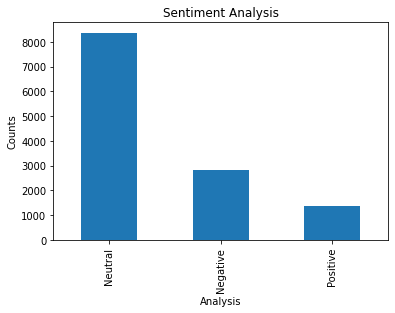

In [21]:
# plotting number of tweets in each sentiment
plt.title('Sentiment Analysis')
plt.xlabel('Analysis')
plt.ylabel('Counts')
data1['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [22]:
#import matplotlib.pyplot as plt
#plt.hist(data.Analysis, bins = 3, align= 'mid')
#plt.xticks(range(3), ['Negative','Neutral', 'Positive'])
#plt.xlabel('Sentiment of Reviews')
#plt.title('Distribution of Sentiment')
#plt.show()

In [23]:
# creating a month column to group data with month
data1['created_at']= data1['created_at'].astype('datetime64[ns]')
data1['month']=pd.DatetimeIndex(data1['created_at']).month
data1.head()

,created_at,id,lang,text,user_location,city,country,latitude,longitude,Tweets,neg,neu,pos,compound,Analysis,month
0,2020-01-27 12:54:39,1221778547716558848,en,RT @NatashaFatah: Big (not all) January storie...,"Richmond Hill, Ontario",Richmond Hill,Canada,43.880078,-79.439392,"[big, not, all, january, stories, killing, ira...",0.385,0.615,0.000,-0.7845,Negative,1
1,2020-01-25 18:57:06,1221144984025325568,en,@eliferhannn @cakepls @PDChina I think it’s he...,"Sacramento, CA",Sacramento,United States of America,38.581572,-121.494400,"[think, its, helpful, put, things, perspective...",0.132,0.609,0.259,0.3612,Neutral,1
2,2020-01-25 17:39:37,1221125484542484482,en,RT @KimKim03420670: !!!!! This is why the dise...,"Johor Bahru, Johor",Johor Bahru,Malaysia,1.495304,103.755084,"[disease, happen, china]",0.000,1.000,0.000,0.0000,Neutral,1
3,2020-01-24 14:10:22,1220710436573798400,en,RT @pumpkinking39: Leave it to a college town ...,"College Station, TX",College Station,United States of America,30.595529,-96.307104,"[leave, college, town, full, alcoholics, make,...",0.104,0.609,0.287,0.4767,Neutral,1
4,2020-01-25 15:35:34,1221094267025752064,en,"I mean same, I was like this when Ebola hit th...",Old hollywood,Hollywood,United States of America,34.098003,-118.329523,"[mean, same, like, ebola, hit, states, reason,...",0.260,0.404,0.336,0.1779,Neutral,1


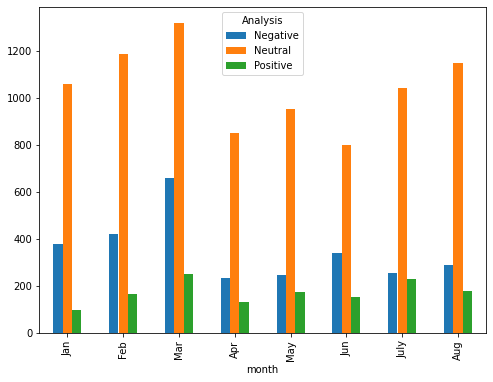

In [25]:
# visualizing sentiments of tweets in each month
fig, ax = plt.subplots(figsize=(8, 6))
tweet_sentiment = data1.groupby(['month', 'Analysis']).Analysis.count().unstack()
tweet_sentiment.plot(kind='bar',ax=ax)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','July','Aug'])
plt.show()

In [26]:
data1.shape

(12579, 16)